<a href="https://colab.research.google.com/github/joanizba/Aguacate-IA/blob/main/Punto1_y_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import avocado_regions as ar

In [29]:
av_df = pd.read_csv('avocado.csv')
av_df
av_df_ordendo=av_df.sort_values(by='Date')
av_df_ordendo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [30]:
av_df = pd.read_csv('avocado.csv')
av_df = av_df.drop(columns=['Unnamed: 0'], errors='ignore')

av_df['category_region'] = av_df['region'].transform(lambda x: ar.get_truly_region(x))
av_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,category_region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,City
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,City
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,City
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,City
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,City


In [31]:
av_df3 = av_df.sort_values(by='region')
av_df3

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,category_region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,City
14766,2017-07-09,2.00,1883.10,38.06,187.90,0.00,1657.14,1657.14,0.00,0.0,organic,2017,Albany,City
14765,2017-07-16,1.87,2889.03,155.10,274.95,0.00,2458.98,2458.98,0.00,0.0,organic,2017,Albany,City
14764,2017-07-23,1.42,4233.61,93.39,93.39,0.00,4046.83,4046.83,0.00,0.0,organic,2017,Albany,City
14763,2017-07-30,1.67,2503.82,55.26,92.99,0.00,2355.57,2355.57,0.00,0.0,organic,2017,Albany,City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11930,2015-01-18,1.71,5508.20,1793.64,2078.72,0.00,1635.84,1620.00,15.84,0.0,organic,2015,WestTexNewMexico,Region
11931,2015-01-11,1.69,6861.73,1822.28,2377.54,0.00,2661.91,2656.66,5.25,0.0,organic,2015,WestTexNewMexico,Region
11932,2015-01-04,1.64,6182.81,1561.30,2958.17,0.00,1663.34,1663.34,0.00,0.0,organic,2015,WestTexNewMexico,Region
11914,2015-05-10,1.43,13607.51,5881.71,4326.02,6.90,3392.88,1853.33,1539.55,0.0,organic,2015,WestTexNewMexico,Region


In [32]:
av_df['Date'] = pd.to_datetime(av_df['Date'])

In [33]:
average_price_by_date = av_df.groupby('Date')['AveragePrice'].mean()
average_price_by_date


,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037
...,...
2018-02-25,1.359630
2018-03-04,1.350185
2018-03-11,1.335093


In [34]:
decomposition = seasonal_decompose(average_price_by_date, model='additive', period=52)


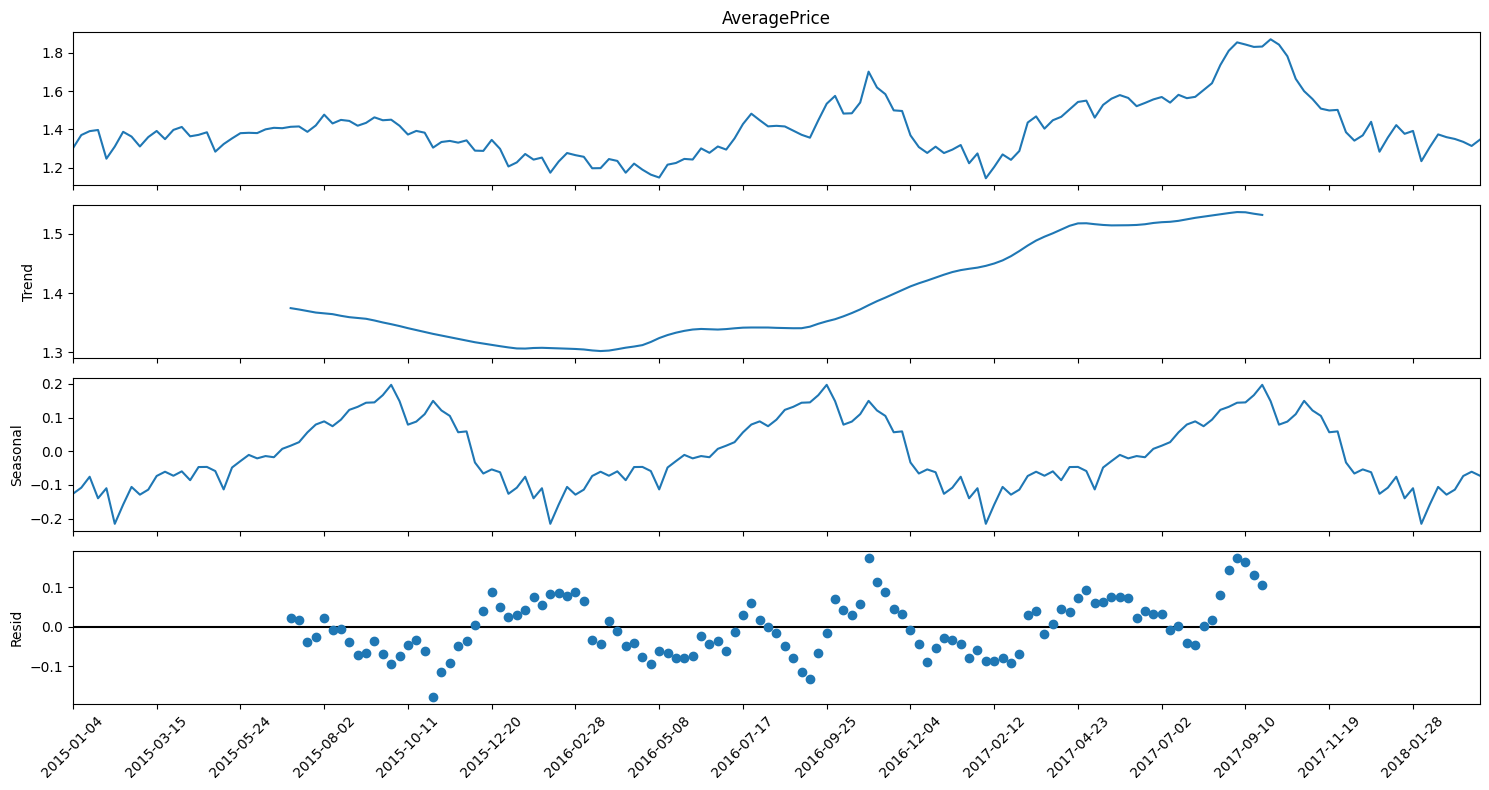

In [35]:
fig = decomposition.plot()
fig.set_size_inches(15, 8)  # Ajustar el tamaño del gráfico para que haya más espacio

# Seleccionamos cada n-ésima fecha para las etiquetas del eje X
n = 10  # Cada 10 fechas mostrar una etiqueta (ajustar según sea necesario)
xticks = average_price_by_date.index[::n]  # Seleccionar fechas cada n elementos

# Ajustar las etiquetas del eje X
ax = fig.axes[0]  # El gráfico principal está en el primer subplot
ax.set_xticks(xticks)  # Establecer las posiciones de las etiquetas en el eje X
ax.set_xticklabels(
    [date.strftime('%Y-%m-%d') for date in xticks],
    ha='right'  # Alinear las etiquetas a la derecha
)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()  # Ajustar automáticamente el diseño del gráfico
plt.show()



---
1.2


In [36]:
region_avg_price = av_df.groupby(['region', 'Date'])['AveragePrice'].mean().reset_index()


In [37]:
regions = region_avg_price['region'].unique()

<ipython-input-38-05dc84717b2c>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


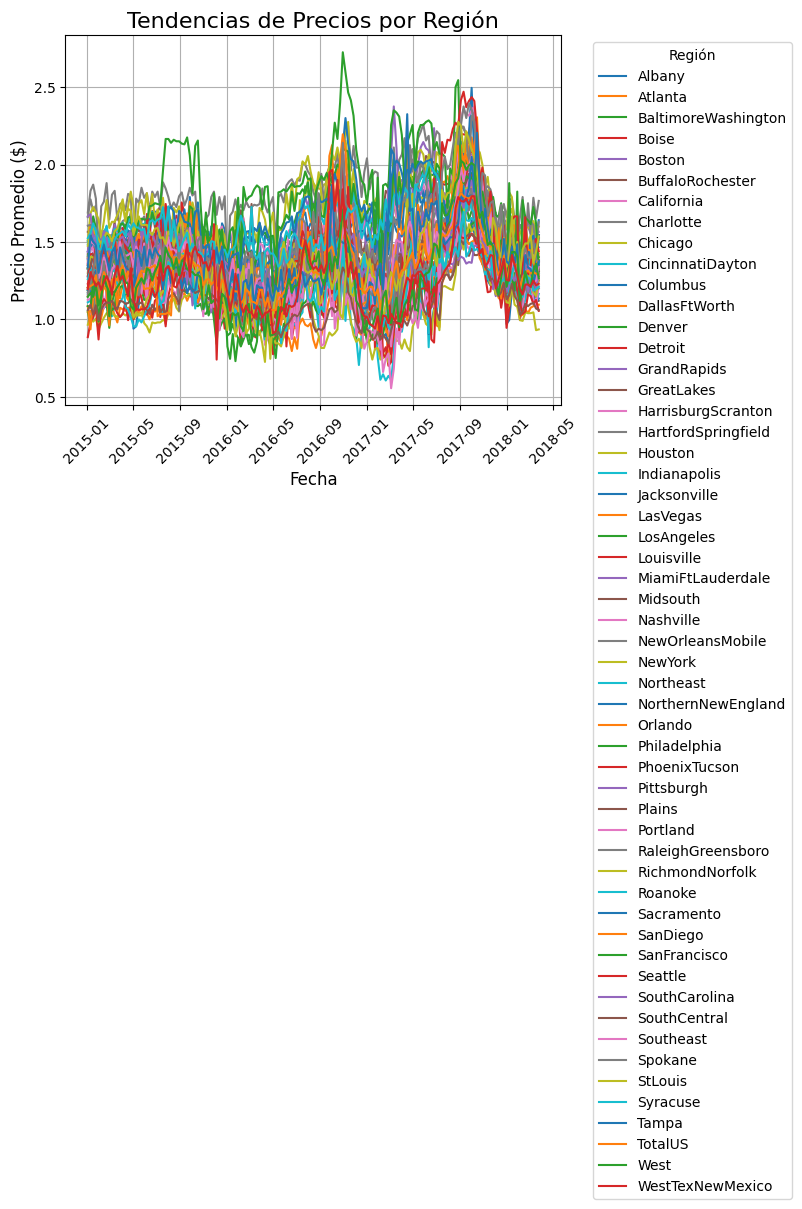

In [38]:
for region in regions:
    region_data = region_avg_price[region_avg_price['region'] == region]
    plt.plot(region_data['Date'], region_data['AveragePrice'], label=region)
plt.title('Tendencias de Precios por Región', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio Promedio ($)', fontsize=12)
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()



---

3-

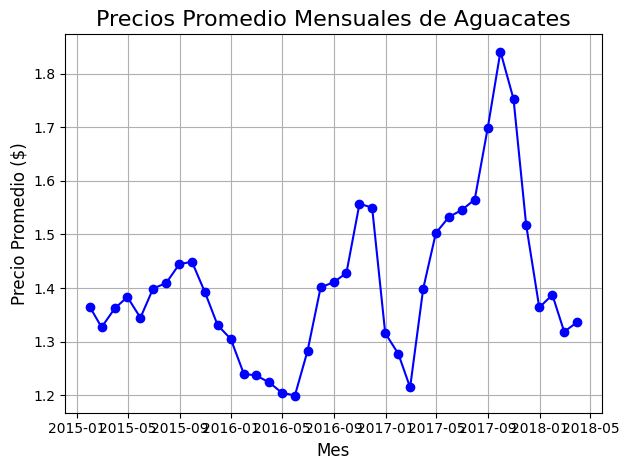

In [39]:
monthly_avg_price = av_df.groupby(pd.Grouper(key='Date', freq='ME'))['AveragePrice'].mean()
plt.plot(monthly_avg_price.index, monthly_avg_price.values, marker='o', linestyle='-', color='b')
plt.title('Precios Promedio Mensuales de Aguacates', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Precio Promedio ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()



---

4-

Date
2015-01-04    8.467434e+07
2015-01-11    7.855581e+07
2015-01-18    7.838878e+07
2015-01-25    7.646628e+07
2015-02-01    1.194532e+08
                  ...     
2018-02-25    1.092314e+08
2018-03-04    1.118449e+08
2018-03-11    1.114652e+08
2018-03-18    1.136740e+08
2018-03-25    1.182690e+08
Name: Total Volume, Length: 169, dtype: float64


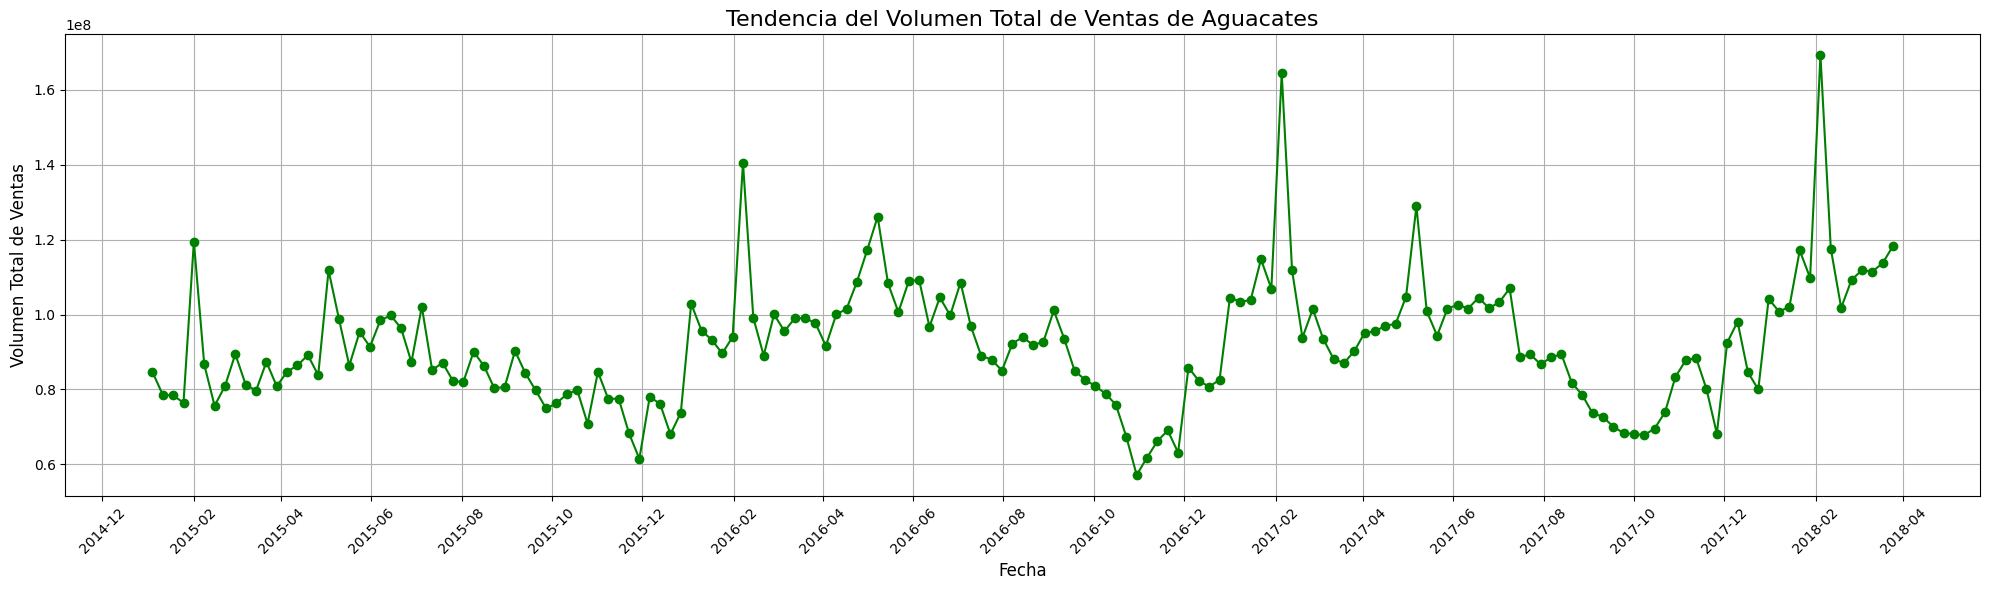

In [40]:
import matplotlib.dates as mdates
total_volume_by_date = av_df.groupby('Date')['Total Volume'].sum()
print(total_volume_by_date)
plt.figure(figsize=(20, 6))
plt.plot(total_volume_by_date.index, total_volume_by_date.values, marker='o', linestyle='-', color='g')
plt.title('Tendencia del Volumen Total de Ventas de Aguacates', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Volumen Total de Ventas', fontsize=12)
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Mostrar cada 3 meses
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato: Año-Mes
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()



---
5-

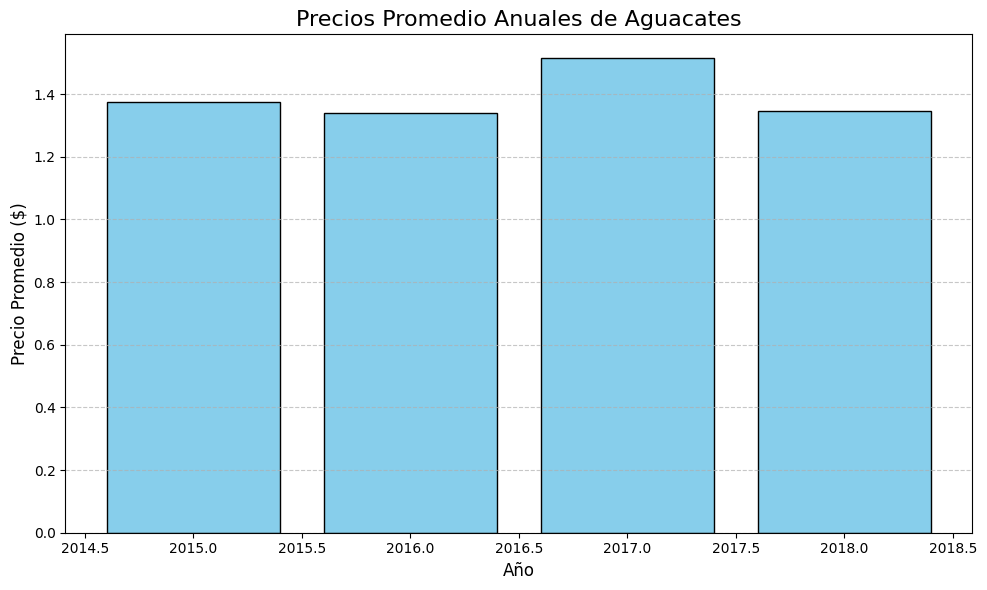

In [41]:
av_df['year'] = av_df['Date'].dt.year
average_price_by_year2 = av_df.groupby('year')['AveragePrice'].mean()
plt.figure(figsize=(10, 6))
plt.bar(average_price_by_year2.index, average_price_by_year2.values, color='skyblue', edgecolor='black')
plt.title('Precios Promedio Anuales de Aguacates', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Precio Promedio ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()

APARTADO 3

In [42]:
av_df['year'] = av_df['Date'].dt.year
average_price_by_year3 = av_df.groupby('year')['AveragePrice'].mean()

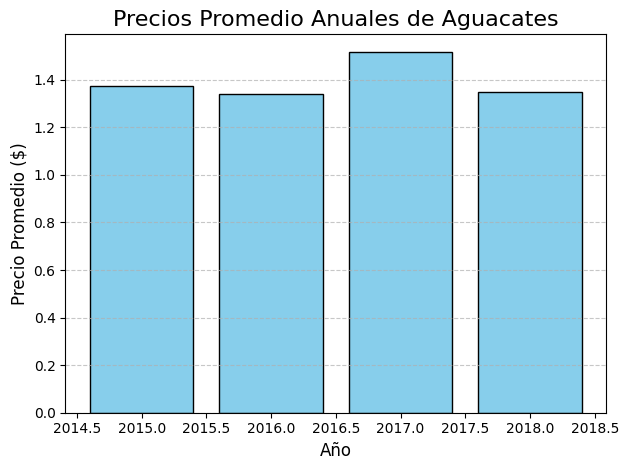

In [43]:
plt.bar(average_price_by_year3.index, average_price_by_year3.values, color='skyblue', edgecolor='black')
plt.title('Precios Promedio Anuales de Aguacates', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Precio Promedio ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



---

2-

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: in

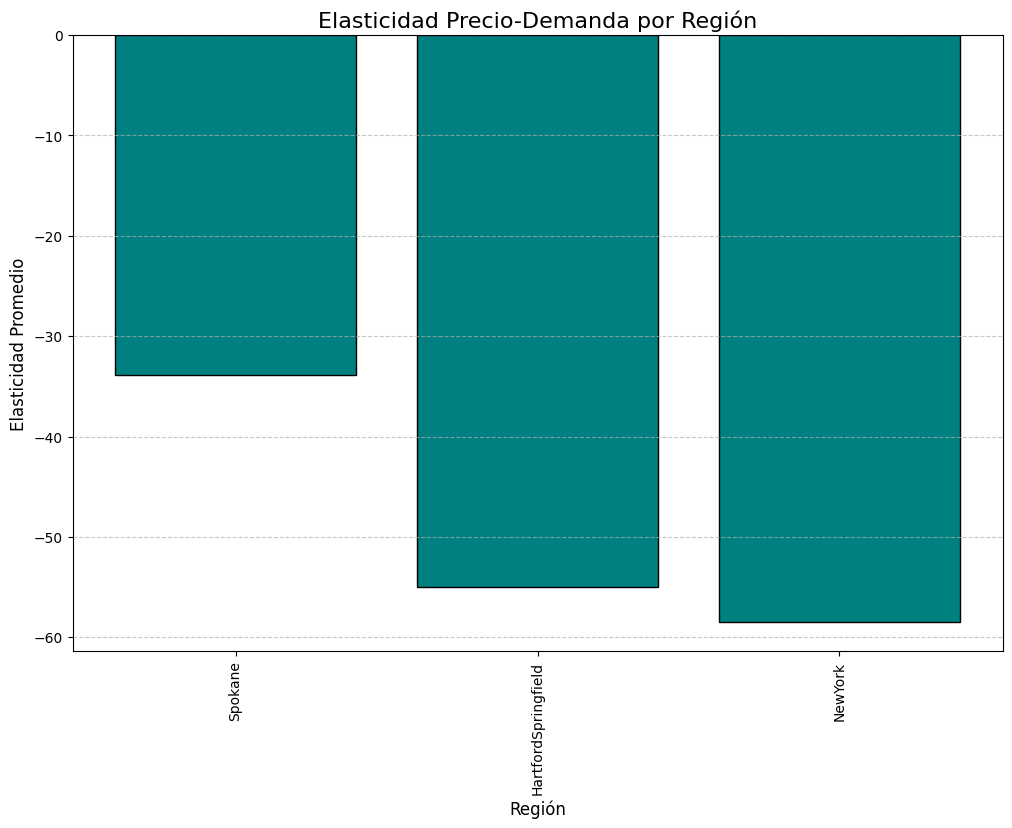

In [44]:
elasticity_by_region = []

# Iterar sobre cada región única en el conjunto de datos
for region in av_df['region'].unique():
    # Filtrar los datos para la región actual
    region_data = av_df[av_df['region'] == region].sort_values('Date')

    # Calcular la variación porcentual de AveragePrice y Total Volume
    region_data['price_change_pct'] = region_data['AveragePrice'].pct_change()
    region_data['volume_change_pct'] = region_data['Total Volume'].pct_change()

    # Calcular la elasticidad precio-demanda
    region_data['elasticity'] = region_data['volume_change_pct'] / region_data['price_change_pct']

    # Calcular la elasticidad promedio (ignorando valores NaN)
    average_elasticity = region_data['elasticity'].mean(skipna=True)

    # Almacenar el resultado
    elasticity_by_region.append({'region': region, 'Elasticity': average_elasticity})

# Convertir la lista de resultados en un DataFrame
elasticity_av_df = pd.DataFrame(elasticity_by_region)

# Ordenar los resultados por elasticidad
elasticity_av_df = elasticity_av_df.sort_values(by='Elasticity', ascending=False)

# Visualizar los resultados con un gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(elasticity_av_df['region'], elasticity_av_df['Elasticity'], color='teal', edgecolor='black')

# Configurar el gráfico
plt.title('Elasticidad Precio-Demanda por Región', fontsize=16)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Elasticidad Promedio', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico

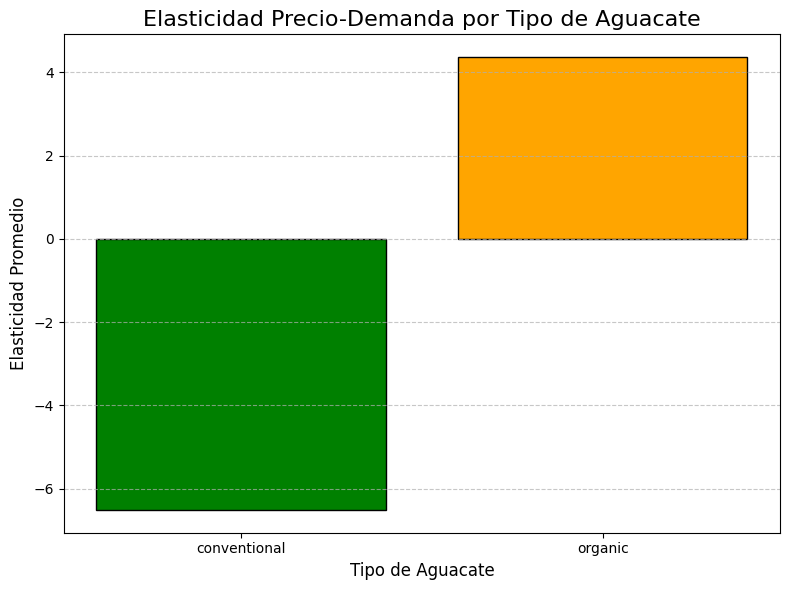

In [45]:
elasticity_by_type = []

# Iterar sobre cada tipo de aguacate (orgánico o convencional)
for avocado_type in av_df['type'].unique():
    # Filtrar los datos para el tipo actual
    type_data = av_df[av_df['type'] == avocado_type].sort_values('Date')

    # Eliminar filas con valores nulos en las columnas relevantes
    type_data = type_data.dropna(subset=['AveragePrice', 'Total Volume'])

    # Calcular la variación porcentual de AveragePrice y Total Volume
    type_data['price_change_pct'] = type_data['AveragePrice'].pct_change()
    type_data['volume_change_pct'] = type_data['Total Volume'].pct_change()

    # Calcular la elasticidad precio-demanda
    type_data['elasticity'] = type_data['volume_change_pct'] / type_data['price_change_pct']

    # Eliminar valores infinitos o nulos generados por divisiones inválidas
    type_data = type_data.replace([float('inf'), float('-inf')], float('nan')).dropna(subset=['elasticity'])

    # Calcular la elasticidad promedio (ignorando valores NaN)
    average_elasticity = type_data['elasticity'].mean(skipna=True)

    # Almacenar el resultado
    elasticity_by_type.append({'Type': avocado_type, 'Elasticity': average_elasticity})

# Convertir la lista de resultados en un DataFrame
elasticity_av_df = pd.DataFrame(elasticity_by_type)

# Visualizar los resultados con un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(elasticity_av_df['Type'], elasticity_av_df['Elasticity'], color=['green', 'orange'], edgecolor='black')

# Configurar el gráfico
plt.title('Elasticidad Precio-Demanda por Tipo de Aguacate', fontsize=16)
plt.xlabel('Tipo de Aguacate', fontsize=12)
plt.ylabel('Elasticidad Promedio', fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

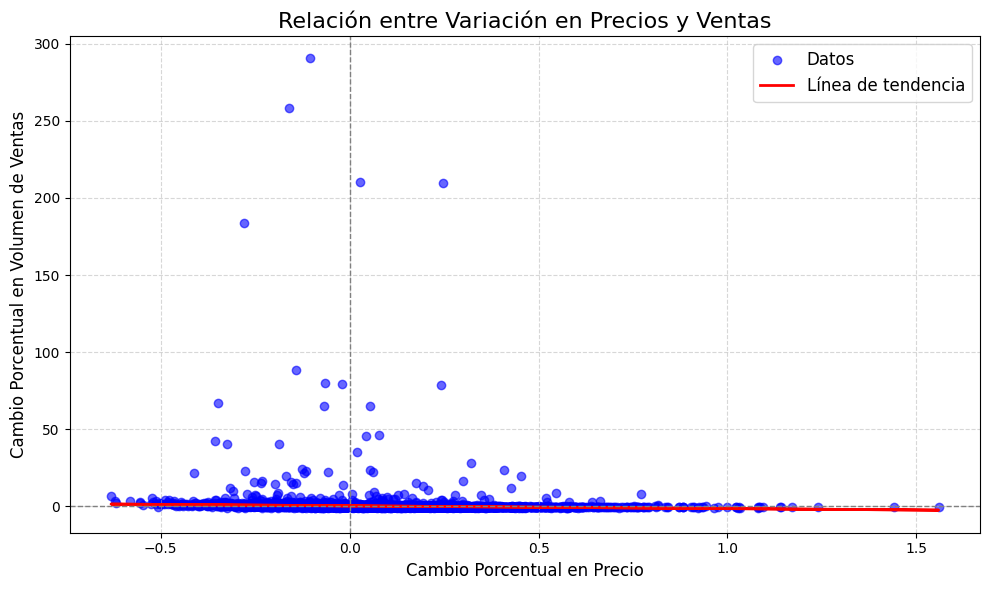

In [46]:
av_df = av_df.dropna(subset=['AveragePrice', 'Total Volume'])

# Calcular la variación porcentual de AveragePrice y Total Volume
av_df['price_change_pct'] = av_df['AveragePrice'].pct_change()
av_df['volume_change_pct'] = av_df['Total Volume'].pct_change()

# Calcular la elasticidad precio-demanda
av_df['elasticity'] = av_df['volume_change_pct'] / av_df['price_change_pct']

# Eliminar valores infinitos o nulos generados por divisiones inválidas
av_df = av_df.replace([float('inf'), float('-inf')], float('nan')).dropna(subset=['price_change_pct', 'volume_change_pct', 'elasticity'])

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(av_df['price_change_pct'], av_df['volume_change_pct'], color='blue', alpha=0.6, label='Datos')

# Ajustar una línea de tendencia utilizando una regresión lineal
m, b = np.polyfit(av_df['price_change_pct'], av_df['volume_change_pct'], 1)
plt.plot(av_df['price_change_pct'], m * av_df['price_change_pct'] + b, color='red', linewidth=2, label='Línea de tendencia')

# Configurar el gráfico
plt.title('Relación entre Variación en Precios y Ventas', fontsize=16)
plt.xlabel('Cambio Porcentual en Precio', fontsize=12)
plt.ylabel('Cambio Porcentual en Volumen de Ventas', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(fontsize=12)
plt.grid(alpha=0.5, linestyle='--')

# Mostrar el gráfico
plt.tight_layout()
plt.show()